# Regresión Lineal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Dataset Fake

In [2]:
X = np.linspace(0.0, 10.0, 1_000_000)

In [3]:
noise = np.random.randn(len(X))

In [4]:
m = 0.5
b = 5.0
Y = (m * X) + b + noise

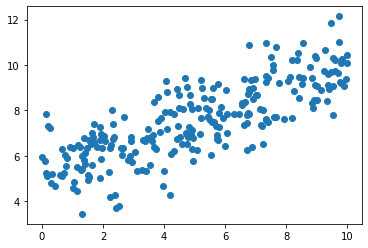

In [5]:
idx = np.random.randint(len(X), size=250)
plt.scatter(X[idx], Y[idx])

### Tensorflow

In [6]:
import tensorflow as tf

Variables

In [7]:
m = tf.Variable(0.2)
b = tf.Variable(1.0)

Placeholders

In [8]:
xph = tf.placeholder(tf.float32, [None])
yph = tf.placeholder(tf.float32, [None])

Grafo

In [9]:
yhat = m*xph + b

Loss

In [10]:
loss = tf.reduce_sum(tf.square(yph-yhat))

Optmizador

In [11]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00001)
train = optimizer.minimize(loss)

Initializador de Variables

In [12]:
init = tf.global_variables_initializer()

### Session

In [13]:
batch_size = 8
losses = []
idx_test = np.random.randint(len(X), size=250)

with tf.Session() as sess:
    sess.run(init)
    episodes = 1000
    
    feed = { xph:X[idx_test] }
    y_pred_pre = sess.run(yhat, feed_dict=feed)
    
    for i in range(episodes):
        idx_batch = np.random.randint(len(X), size=batch_size)
        feed = { xph:X[idx_batch], yph:Y[idx_batch] }
        _, loss_ep = sess.run( [train, loss], feed_dict=feed )
        losses.append(loss_ep)
    model_m, model_b = sess.run([m, b])
    
    
    feed = { xph:X[idx_test] }
    y_pred = sess.run(yhat, feed_dict=feed)

In [14]:
model_m

1.0584189

In [15]:
model_b

1.28076

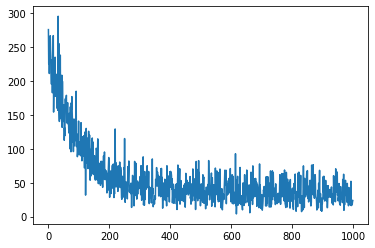

In [16]:
plt.plot(losses)

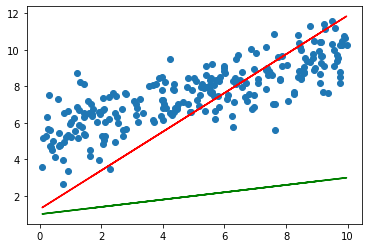

In [17]:
plt.scatter(X[idx_test], Y[idx_test])
plt.plot(X[idx_test], y_pred_pre, color='g')
plt.plot(X[idx_test], y_pred, color='r')